# Seite 1

In [2]:
import drawsvg as dw
%load_ext jhmagics

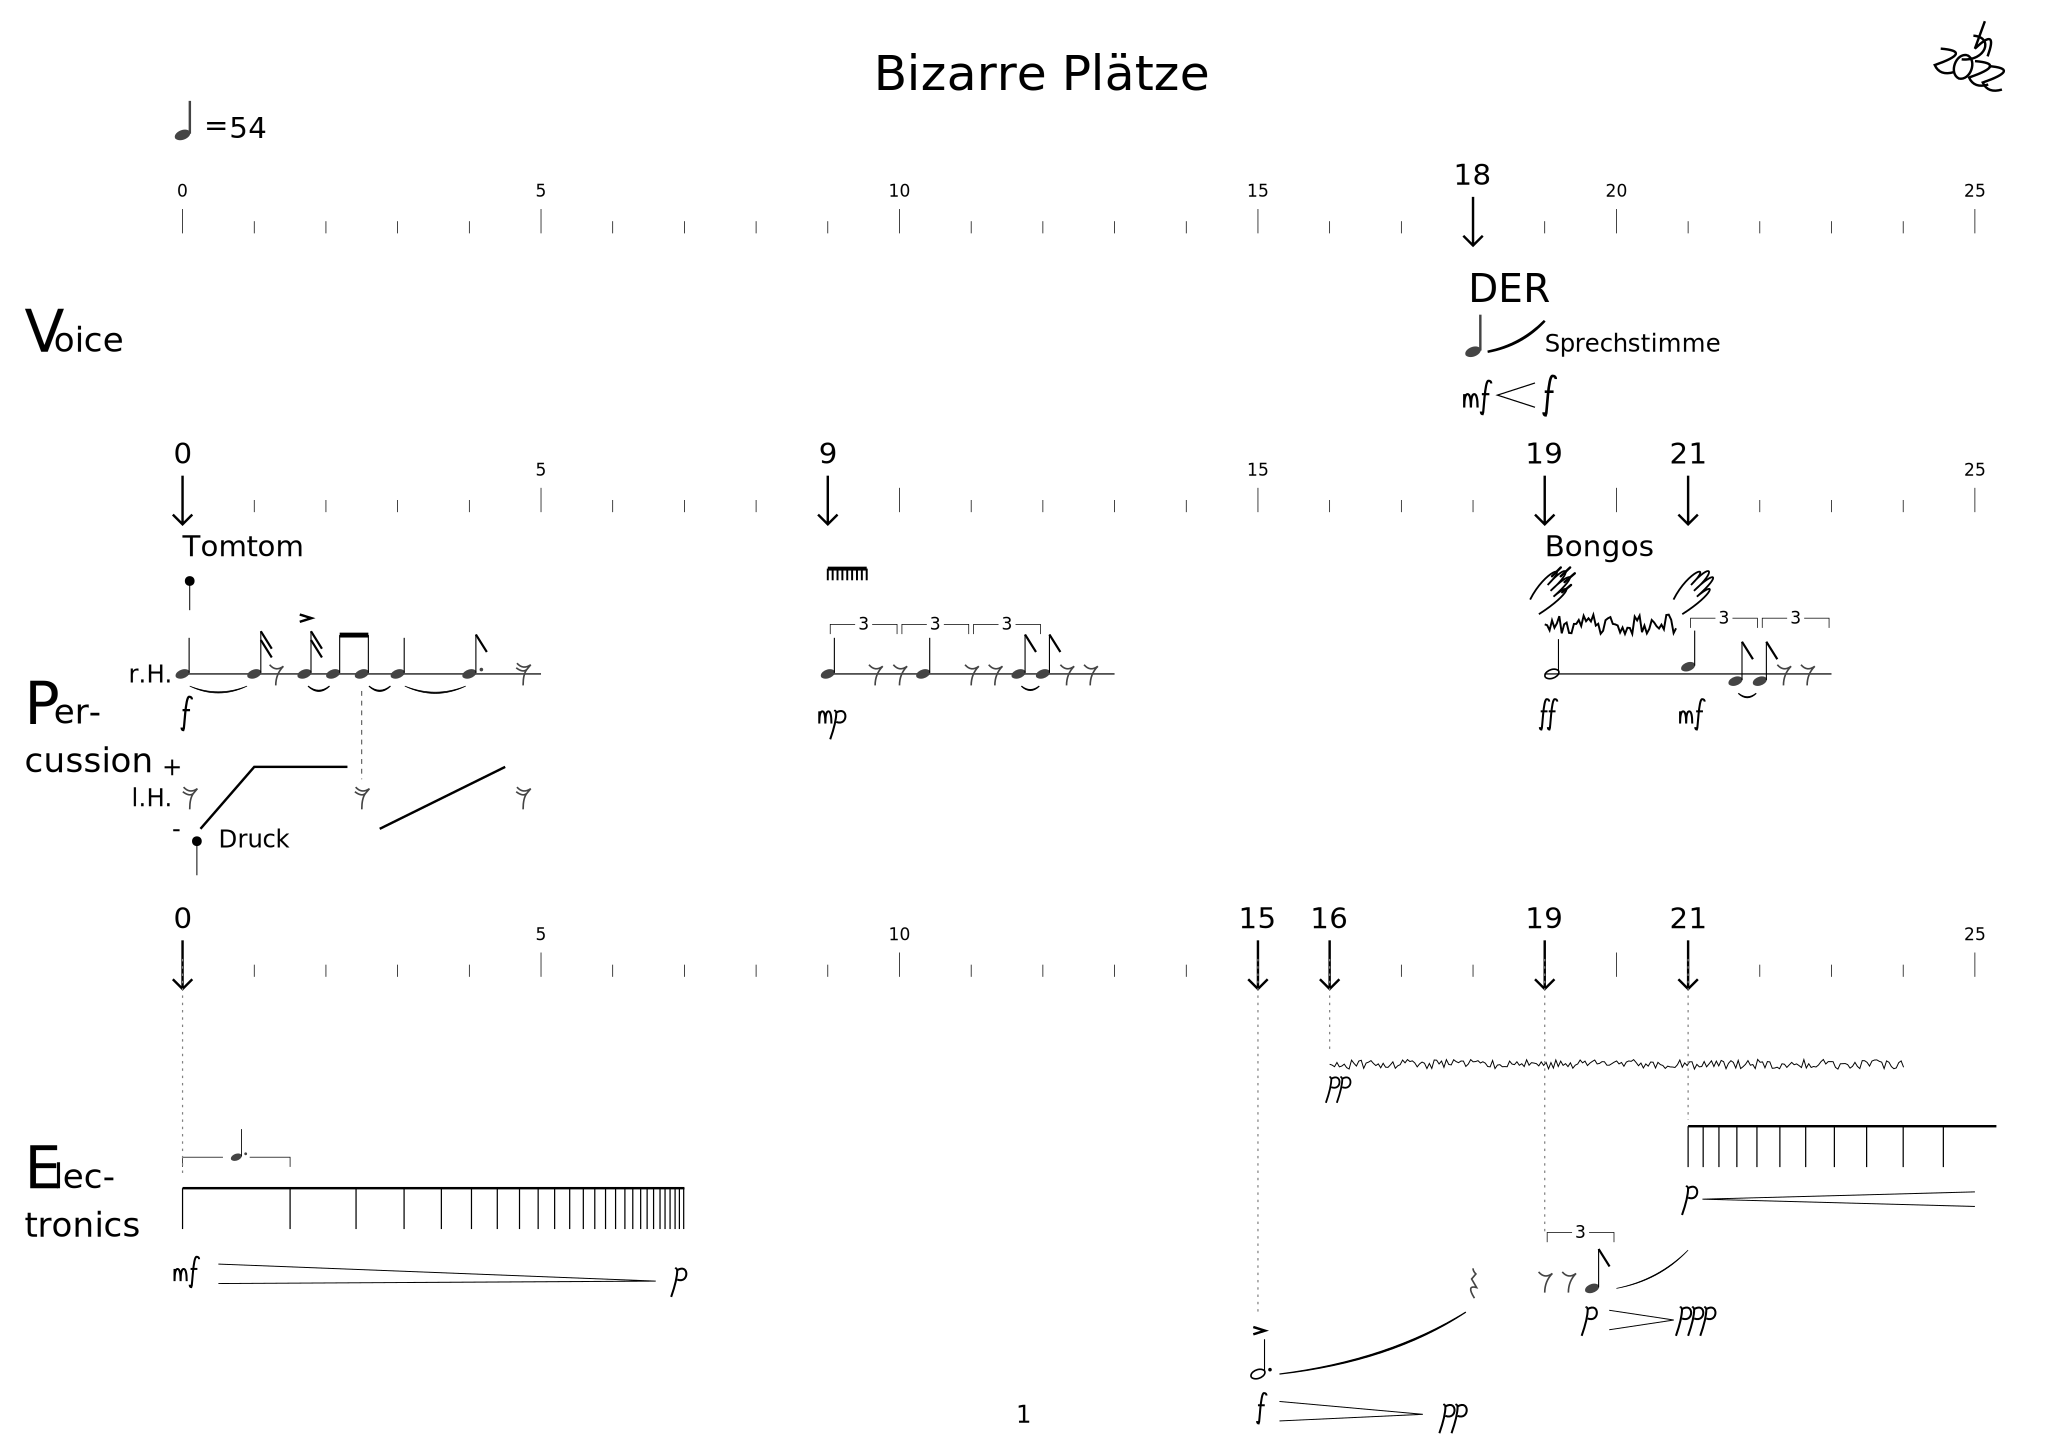

In [3]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# fonts: Simvoni für zahlen und text sprechstimme
#        Cantarell für musikalische anweisungen

# seitenzahl
seite = 1
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

xnum = 26 # posts (= one more than divisions)
ynum =22
mleft = 75
mright = 30
mtop = 30
mbot = 30
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten
tm0 = 0  # zeit am anfang dieser seite
off = 15
 # normale zahlen in V P E
norm = [[0,5,10,15,20,25],[5,15,25],[5,10,25]]
 # events in V P E
event = [[18],[0,9,19,21],[0,15,16,19,21]]
 # ygrid positionen
ytime = (2,6.5,14)
for l in range(3):
    y = ygrid(ytime[l])
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif i in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)
            #if l==2: rect(x-9,y-18,18,17,stroke='black',fill='none')

# titel und logo
text('Bizarre Plätze',xgrid(12),ygrid(0),20,text_anchor='middle',dominant_baseline='middle')
jh2022(xgrid(25),20)

# tempo
viertel(xgrid(0),ygrid(1),1,5)
text('=',xgrid(.3),ygrid(1),12)
text('54',xgrid(.65),ygrid(1.05),12)

# instrumente links
x = 10
for i,t,u in zip((4.5,10.5,18),('V','P','E'),(['oice'],['er-','cussion'],['lec-','tronics'])):
    y = ygrid(i)
    text(t,x,y,24)
    text(u[0],x+12,y)
    if len(u) > 1: text(u[1],x,y+20)

# VOICE
x = xgrid(18)
text('DER',x-2,ygrid(3.1),16,dominant_baseline='hanging')
viertel(x,ygrid(4.5),1.1,5)
glisscurve(x+6,ygrid(4.5),xgrid(19),ygrid(4))
text('Sprechstimme',xgrid(19),ygrid(4.5),10,font_family='Cantarell Light',font_style='italic')
mezzoforte(x,ygrid(5.4),11)
forte(xgrid(19),ygrid(5.4),13)
cresc(xgrid(18)+10,ygrid(5.2),xgrid(19)-4,ygrid(5.2),sw=.5)


################# PERCUSSION #################

 # linien
yg_perc = 9.7
y = ygrid(yg_perc)
startends = [0,5,9,13,19,23]
for i in range(3):
    line(xgrid(startends[i*2]),y,xgrid(startends[i*2+1]),y,stroke_width=0.5)
    
 # instrumente und symbole
text('Tomtom',xgrid(0),ygrid(7.8),12,font_family='Cantarell')
text('Bongos',xgrid(19),ygrid(7.8),12,font_family='Cantarell')
percHardMallet(xgrid(0.1),ygrid(8.2),prop=6)
buerste(xgrid(9),ygrid(8),8)
kralle(xgrid(19),ygrid(8.5))
hand(xgrid(21),ygrid(8.5))

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

 # erste gruppe
  # rechte hand
y = ygrid(yg_perc)
text('r.H.',xgrid(0)-5,y,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
not4tel(xgrid(0),y,nothals,notsiz)
not16tel(xgrid(1),y,nothals,notsiz)
tie(xgrid(0.1),y+5,xgrid(0.9),y+5,1,.3)
paus8tel(xgrid(1.3),y,pausiz)
not16tel(xgrid(1.7),y,nothals,notsiz)
accent(xgrid(1.7),ygrid(yg_perc-0.9),6)
tie(xgrid(1.75),y+5,xgrid(2.05),y+5,2,.5)
xb1,yb1 = not4tel(xgrid(2.1),y,nothals+.1,notsiz)
xb2,yb2 = not4tel(xgrid(2.5),y,nothals+.1,notsiz)
line(xb1,yb1,xb2,yb2,stroke_width=2)
tie(xgrid(2.6),y+5,xgrid(2.9),y+5,2,.5)
not4tel(xgrid(3),y,nothals,notsiz)
tie(xgrid(3.1),y+5,xgrid(3.95),y+5,1,.3)
not8tel(xgrid(4),y,nothals,notsiz,dotted=1)
paus16tel(xgrid(4.75),y,pausiz)
forte(xgrid(0),ygrid(yg_perc+.8),dynsiz+1,swfac=1.5)
line(xgrid(2.5),y+7,xgrid(2.5),ygrid(11.4),stroke_width=0.3,stroke_dasharray='2 2')
  # linke hand
ygridindx = 11.7
ygridminus = ygridindx+0.5
ygridplus = ygridindx-0.5
text('l.H.',xgrid(0)-5,ygrid(ygridindx),10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('+',xgrid(0)-1,ygrid(ygridplus),10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('-',xgrid(0)-1,ygrid(ygridminus),10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
percHardMallet(xgrid(0.2),ygrid(ygridindx+.7))
paus16tel(xgrid(0.1),ygrid(ygridindx),pausiz)
lines(xgrid(.25),ygrid(ygridminus),xgrid(1),ygrid(ygridplus),xgrid(2.3),ygrid(ygridplus))
paus16tel(xgrid(2.5),ygrid(ygridindx),pausiz)
lines(xgrid(2.75),ygrid(ygridminus),xgrid(4.5),ygrid(ygridplus))
paus16tel(xgrid(4.75),ygrid(ygridindx),pausiz)
text('Druck',xgrid(.5),ygrid(ygridindx+.8),10,font_family='Cantarell')

 # zweite gruppe
  # noten
not4tel(xgrid(9),y,nothals,notsiz)
paus8tel(xgrid(9.66),y,pausiz)
paus8tel(xgrid(10),y,pausiz)
not4tel(xgrid(10.33),y,nothals,notsiz)
paus8tel(xgrid(11),y,pausiz)
paus8tel(xgrid(11.33),y,pausiz)
not8tel(xgrid(11.66),y,nothals,notsiz)
tie(xgrid(11.7),y+5,xgrid(11.95),y+5,2,.5)
not8tel(xgrid(12),y,nothals,notsiz)
paus8tel(xgrid(12.33),y,pausiz)
paus8tel(xgrid(12.66),y,pausiz)
  # triolen und dynamik
nlets(xgrid(9),ygrid(8.9),xgrid(10),ygrid(8.9),3)
mezzopiano(xgrid(9),ygrid(10.5),dynsiz)
    
 # dritte gruppe
not2tel(xgrid(19.1),y,nothals,notsiz)
kratzgliss(xgrid(19),ygrid(8.9),xgrid(20.8),ygrid(8.9))
not4tel(xgrid(21),y-notsiz*.66,nothals,notsiz)
not8tel(xgrid(21.66),y+notsiz*.66,nothals,notsiz)
tie(xgrid(21.7),y+notsiz*.66+5,xgrid(21.95),y+notsiz*.66+5,2,.5)
not8tel(xgrid(22),y+notsiz*.66,nothals,notsiz)
paus8tel(xgrid(22.33),y,pausiz)
paus8tel(xgrid(22.66),y,pausiz)
nlets(xgrid(21),ygrid(8.8),xgrid(22),ygrid(8.8),2)
fortissimo(xgrid(19),ygrid(10.5),dynsiz)
mezzoforte(xgrid(21),ygrid(10.5),dynsiz)


################# ELEKTRONIK #################

# EVENT 0
 # zeichen
evtxindx = [0.0, 1.5, 2.42, 3.09, 3.61, 4.03, 4.39, 4.7, 4.96, 5.19, 5.4, 5.59, 5.75, 5.9, 
            6.04, 6.17, 6.28, 6.39, 6.48, 6.57, 6.66, 6.73, 6.8, 6.87, 6.93, 6.99]
y = ygrid(18) #oben
l = yunit*.66
for i in evtxindx:
    vline(xgrid(i),y,l,sw=.5)
hline(xgrid(0),y,xunit*7)
 # dynamik
y += yunit*1.5
mezzoforte(xgrid(0),y,dynsiz)
piano(xgrid(6.9),y,dynsiz)
dim(xgrid(.5),y-3,xgrid(6.6),y,dynsiz-2)
 # zusatz
y -= yunit*2
not4tel(xgrid(1.5/2),y,nothals,notsiz-1,dotted=1)
nlet(xgrid(0),y,xgrid(1.5),y,text='',textspace=11,margin=0)

# EVENT 15 UND 19
 # noten und pausen
ygindx = 21
not2tel(xgrid(15),ygrid(ygindx),nothals,notsiz,dotted=1)
glisscurve(xgrid(15.3),ygrid(ygindx),xgrid(17.9),ygrid(ygindx-1),sw=.5)
y = ygrid(ygindx-1.5)
paus4tel(xgrid(18),y,pausiz)
paus8tel(xgrid(19),y,pausiz)
paus8tel(xgrid(19.33),y,pausiz)
not8tel(xgrid(19.66),y+3,nothals,notsiz)
nlet(xgrid(19),y-20,xgrid(20),y-20)
glisscurve(xgrid(20),y+3,xgrid(21),y-yunit/2,sw=.3)
 # dynamik
accent(xgrid(15),ygrid(ygindx-.7),dynsiz-4)
forte(xgrid(15),ygrid(ygindx+.7),dynsiz)
pianissimo(xgrid(17.7),ygrid(ygindx+.7),dynsiz)
dim(xgrid(15.3),ygrid(ygindx+.6),xgrid(17.3),ygrid(ygindx+.65),dynsiz-2)
piano(xgrid(19.6),y+16,dynsiz)
piano3(xgrid(21),y+16,dynsiz)
dim(xgrid(19.9),y+16,xgrid(20.8),y+16,dynsiz-2)

# EVENT 16
y = ygrid(16)
kratzgliss(xgrid(16),y,xgrid(24),y,h=2)
pianissimo(xgrid(16.1),y+10,dynsiz-1)

# EVENT 21
y = ygrid(17) #oben
hline(xgrid(21),y,xunit*4.3)
l = yunit*.66
klacks = [21.0, 21.21, 21.43, 21.68, 21.96, 22.28, 22.64, 23.04, 23.49, 
          24.0, 24.56, 25.2, 25.92, 26.72, 27.62, 28.64]
for i in klacks:
    if i < 25:
        vline(xgrid(i),y,l,sw=.5)
piano(xgrid(21),y+30,dynsiz)
cresc(xgrid(21.2),y+30,xgrid(25),y+30,dynsiz-4)

# hilfslinien
vline(xgrid(0),ygrid(14.3),yunit*3.5,sw=.5,c='gray',stroke_dasharray='1 2')
vline(xgrid(15),ygrid(14.3),yunit*5.7,sw=.5,c='gray',stroke_dasharray='1 2')
vline(xgrid(16),ygrid(14.3),yunit*1.5,sw=.5,c='gray',stroke_dasharray='1 2')
vline(xgrid(19),ygrid(14.3),yunit*4.4,sw=.5,c='gray',stroke_dasharray='1 2')
vline(xgrid(21),ygrid(14.3),yunit*2.6,sw=.5,c='gray',stroke_dasharray='1 2')

        
d.set_pixel_scale(4)
d.save_png('partitur_01.png')
d.save_svg('partitur_01.svg')
d